In [2]:
#list and set comprehension
clients = [("John",500000),
           ("Doe",55000),
           ("Zdaay",1250000),
           ("Tonny",1050000)]

#client earnig more than ->$1M
high_pay = [x for x,y in clients if y>1000000]
print(high_pay)

['Zdaay', 'Tonny']


In [3]:
#dictinary comprehension
employees = {
      'Andrew':1000000,
      'Ben':500000,
      'Carol':700000,
      'Pilato':1400000
}

top_earns = [(k,v) for k,v in employees.items() if v >= 1000000]
print(top_earns)

[('Andrew', 1000000), ('Pilato', 1400000)]


In [4]:
#list text data comprehension
text_data = '''
    The behavior of the Go compiler can be configured using additional arguments, although the default 
settings are sufficient for most projects. The two most useful are -a, which forces a complete rebuild 
even for files that have not changed, and -o, which specifies the name of the compiled output file. 
Use the go help build command to see the full list of options available
'''

w = [[x for x in line.split() if len(x)>3] for line in text_data.split('\n')]
print(w)

[[], ['behavior', 'compiler', 'configured', 'using', 'additional', 'arguments,', 'although', 'default'], ['settings', 'sufficient', 'most', 'projects.', 'most', 'useful', 'which', 'forces', 'complete', 'rebuild'], ['even', 'files', 'that', 'have', 'changed,', 'which', 'specifies', 'name', 'compiled', 'output', 'file.'], ['help', 'build', 'command', 'full', 'list', 'options', 'available'], []]


In [6]:
txt_data = ['The behavior of the Go compiler.',
           'can be configured using additional arguments.',
           'although the default settings are sufficient for most projects.']

mark = map(lambda s: (True, s) if ' compiler' in s else (False,s), txt_data)
print(mark)

In [20]:
#equally spplit list into equally sized chucnks
#1. By implementing your own generator
my_list = list(range(10))

def chunk(lst,n):
    for i in range(0,len(lst),n):
        yield lst[i:i+n]
    
chunks = list(chunk(my_list,3))
print("Using a custom generator",chunks)

#2 using a one-liner
m =3
#Generator comprehension
one_chunks = (my_list[i:i+m] for i in range(0,len(my_list),m))
print("Generator comprehension",list(one_chunks))

#list comprehesion
list_chunks = [my_list[i:i+m] for i in range(0,len(my_list),m)]
print("List comprehension",list_chunks)

#3 Using itertools.zip_longest
from itertools import zip_longest

def iter_chunk(lst,n):
    return zip_longest(*[iter(lst)]*n,fillvalue=None)

iter_chunks = list(iter_chunk(my_list,3))
print("Using itertools.zip_longest ",iter_chunks)

#4. Using itertools.isslice
from itertools import islice

def slice_chunk(lst,n):
    it = iter(lst)
    return iter(lambda: tuple(islice(it,n)),())

sliece_chunks = list(slice_chunk(my_list,3))
print("Using itertools.isslice",sliece_chunks)

#5 using itertools.batched
#from itertools import batched

#batch_chunks = list(batched(my_list,3))
#print("Using itertools.batched",batch_chunks)

Using a custom generator [[0, 1, 2], [3, 4, 5], [6, 7, 8], [9]]
Generator comprehension [[0, 1, 2], [3, 4, 5], [6, 7, 8], [9]]
List comprehension [[0, 1, 2], [3, 4, 5], [6, 7, 8], [9]]
Using itertools.zip_longest  [(0, 1, 2), (3, 4, 5), (6, 7, 8), (9, None, None)]
Using itertools.isslice [(0, 1, 2), (3, 4, 5), (6, 7, 8), (9,)]


In [24]:
#Deleting a key from the dictionary
#1. Using del keyword
data = {'a':1,'b':2,'d':4}
del data['a']
print(data)

if 'c' in data:
    del data['c']

try:
    del data['c']
except KeyError:
    pass

#2. using pop keyword
data.pop('d',None)

{'b': 2, 'd': 4}


4

In [28]:
#Writing a context mananger

#1. Use contextlib.contextmanager decorator
"""
    This how we write it
      ->decorate a function with @contextmanager
      ->use a try-finally block
      ->the try block must yield the source
      ->the finally block is used to free the resource
"""
from contextlib import contextmanager

@contextmanager
def managed_resource(*args,**kwargs):
    resource = acquire_resource(*args,**kwargs)
    try:
        yield resource
    finally:
        release_resource(resource)
        
with managed_resource(timeout=3600) as resource:
   #do something

SyntaxError: incomplete input (1023304043.py, line 22)

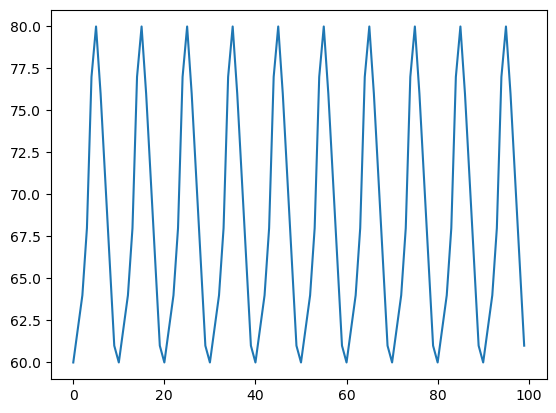

In [29]:
import matplotlib.pyplot as plt

cardiac_cycles = [62,60,62,64,68,77,80,76,71,66,61,60,62]

expected_cycles = cardiac_cycles[1:-2]*10

plt.plot(expected_cycles)
plt.show()

In [ ]:
#handling images
# 1 Remove image background
#!pip install rembg || pip install rembg[gpu]
"""
import PIL
PIL.__version__

from rembg import remove

input_path = ''
output_path = ''

with open(input_path,'rb') as i:
   with open(output_path,'wb') as o:
      input = i.read()
      output = remove(input)
      o.write(output)
"""

In [37]:
#measuring elapsed time
#1 Use time.time()
import time

start = time.time()
end = time.time()
print("Using time.time()",end-start)

#2 use timeit.default_timer()
from timeit import default_timer as timer

start_it = timer()
end_it = timer()
print("Using timeit.default_timer()",end_it - start_it)

#Using timeit in code
import timeit
print("Usage in code",timeit.timeit(lambda: "-".join(map(str,range(100))),number=1000))

#Using in juypter notebook
def cell_runtime():
    for i in range(100): i+1
print("Showing usage in notebooks")
%timeit -n 1000 cell_runtime()

#Using decorator to measure time of a function
def func_timer(func):
    def wrapper(*args,**kwargs):
        t1 = timer()
        result = func(*args,**kwargs)
        t2 = timer()
        print(f'{func.__name__}() executed in {(t2-t1):.6f}s')
        return result
    return wrapper

#then this decorator can be applied to all functions as follows
@func_timer
def test_func_time():
    for i in range(1000): i * 1
test_func_time()

Using time.time() 0.0
Using timeit.default_timer() 4.3199994252063334e-05
Usage in code 0.026254900003550574
Showing usage in notebooks
4.89 µs ± 324 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
test_func_time() executed in 0.000072s


In [39]:
#copying a list
a = [1,2,3,4,5]
b = a
b.append(6)
print(b)
print(a)

#using deepcopy
import copy

d = [[1,2],[3,4]]
c = copy.deepcopy(d)
c[0].append(99)
print("# Using copy")
print(c)
print(d)

[1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 5, 6]
# Using copy
[[1, 2, 99], [3, 4]]
[[1, 2], [3, 4]]
